In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing

In [25]:
# Loading the MNIST datasets - 60000 images for training and 10000 images for testing
(imageTrain, labelTrain), (imageTest, labelTest) = tf.keras.datasets.mnist.load_data()
# Splitting the training set into 2: 55000 images for training and 5000 images for validation
# Raw 2d array
imageTrainRaw = imageTrain[:55000]
labelTrainRaw = labelTrain[:55000]
imageValidRaw = imageTrain[55000:]
labelValidRaw = labelTrain[55000:]
# Processed 1d array
imageTrainPro = np.reshape(imageTrainRaw, (55000, 784))
imageTrainPro = preprocessing.normalize(imageTrainPro, norm="max")
labelTrainPro = np.zeros((55000, 10))
for idx in range(55000):
    labelTrainPro[idx][labelTrainRaw[idx]] = 1
imageValidPro = np.reshape(imageValidRaw, (5000, 784))
imageValidPro = preprocessing.normalize(imageValidPro, norm = "max")
labelValidPro = np.zeros((5000, 10))
for idx in range(5000):
    labelValidPro[idx][labelValidRaw[idx]] = 1

0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    51   159  253  159  50   0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    48   238  252  252  252  237  0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    54   227  253  252  239  233  252  57   6    0    0    0    0    0    0    
0    0    0  

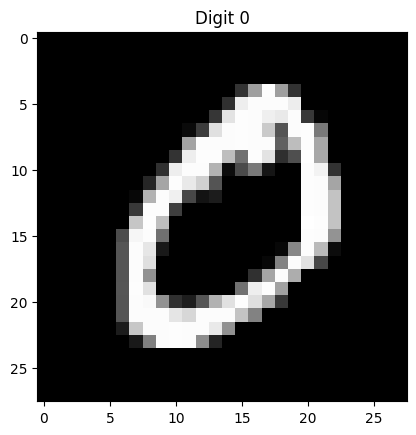

In [26]:
idx = 1
# Visualizing an image array
imageArr = ""
for row in imageTrainRaw[idx]:
    for col in row:
        if(len(str(col)) == 1):
            print(str(col) + "   ", end =" ")
            imageArr += str(col) + "   "
        elif(len(str(col)) == 2):
            print(str(col) + "  ", end =" ")
            imageArr += str(col) + "  "
        else:
            print(str(col) + " ", end =" ")
            imageArr += str(col) + " "
    print()
    imageArr += "\n"
with open("./test/imageArr.txt", "w") as file:
    file.write(imageArr)
# Plotting an image
plt.title(f"Digit {labelTrainRaw[idx]}")
plt.imshow(imageTrainRaw[idx], cmap='gray')
plt.savefig("./test/digit_grey.jpg")

In [27]:
# Setting up the neural network architecture and hyperparameters
inputLayer = 784  # input layer (28x28 pixels)
hiddenLayer1 = 512  # 1st hidden layer (14x14 pixel)
hiddenLayer2 = 256  # 2nd hidden layer
hiddenLayer3 = 128  # 3rd hidden layer
outputLayer = 10  # output layer (0-9 digits)

learningRate = np.float_power(10, -4)
iterations = 1000
size = 55000
dropout = 0.5

theta = np.random.rand(784, 10)
theta = np.reshape(theta, (10, 784))
b = np.random.rand(10)

In [52]:
# Simple softmax function implementation
def softmax(y):
    e = np.exp(y)
    return e / sum(e)

def fLoss(theta, b, size):
    result = 0
    for n in range(size): # Loop through all inputs
        x = imageTrainPro[idx]
        yCal = theta.dot(x) + b
        yGiven = labelTrainPro[n]
        resultArr = softmax(yCal) - yGiven
        for i in range(10): # Loop through all matrix y elements
            result += np.power(resultArr[i], 2)
    return result / 2
    # return result / (2 * size)

def dfLoss(theta):
    result = np.zeros((10, 10))
    x = imageTrainPro[idx]
    yCal = theta.dot(x) + b
    yCal = softmax(yCal)
    for i in range(10):
        for j in range(10):
            if(i == j):
                result[i][j] = yCal[i] * (1 - yCal[j])
            else:
                result[i][j] = yCal[i] * (-1 * yCal[j])
    print(result)
            



for idx in range(1):
    # loss = fLoss(theta, b, size)
    dloss = dfLoss(theta)
    


[[ 7.09317241e-04 -3.96639134e-07 -2.87961828e-04 -3.48383367e-05
  -1.22088842e-07 -8.28324416e-06 -3.36724338e-06 -3.66386628e-04
  -2.54754139e-06 -5.41369094e-06]
 [-3.96639134e-07  5.58475233e-04 -2.26690171e-04 -2.74255395e-05
  -9.61111426e-08 -6.52076022e-06 -2.65077139e-06 -2.88427976e-04
  -2.00548314e-06 -4.26178195e-06]
 [-2.87961828e-04 -2.26690171e-04  2.41104165e-01 -1.99110673e-02
  -6.97771298e-05 -4.73410179e-03 -1.92447217e-03 -2.09400032e-01
  -1.45598995e-03 -3.09407322e-03]
 [-3.48383367e-05 -2.74255395e-05 -1.99110673e-02  4.66715573e-02
  -8.44181034e-06 -5.72743384e-04 -2.32827420e-04 -2.53337356e-02
  -1.76149278e-04 -3.74328658e-04]
 [-1.22088842e-07 -9.61111426e-08 -6.97771298e-05 -8.44181034e-06
   1.71969873e-04 -2.00714451e-06 -8.15929596e-07 -8.87805424e-05
  -6.17304478e-07 -1.31181212e-06]
 [-8.28324416e-06 -6.52076022e-06 -4.73410179e-03 -5.72743384e-04
  -2.00714451e-06  1.15333049e-02 -5.53575903e-05 -6.02340804e-03
  -4.18816630e-05 -8.90012544e-05